# Using Naive Bayes on the Iris dataset and comparing its performance with KNN.

In [108]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt

In [109]:
# load the iris dataset
iris= load_iris()
X, y= iris.data, iris.target

In [110]:
# Splitting of data
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size= 0.2, random_state= 42)

In [111]:
gnb= GaussianNB()

In [112]:
gnb.fit(X_train, y_train)


GaussianNB()

In [113]:
y_pred= gnb.predict(X_test)

In [114]:
#Evalaution of model
accuracy= accuracy_score(y_test, y_pred)
conf_matrix= confusion_matrix(y_test, y_pred)
class_report= classification_report(y_test, y_pred)

In [115]:
print("Accuracy:", accuracy)
print("\nConfusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", class_report)

Accuracy: 1.0

Confusion Matrix:
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



wow amazing accuracy

# Use knn

In [116]:
from sklearn.neighbors import KNeighborsClassifier

In [117]:
from sklearn.neighbors import KNeighborsClassifier

In [118]:
# Choosing k value
from sklearn.model_selection import cross_val_score
accuracy_rate= []
for i in range(1,40):
    knn= KNeighborsClassifier(n_neighbors=i)
    score= cross_val_score(knn, X, y, cv=10)
    accuracy_rate.append(score.mean())

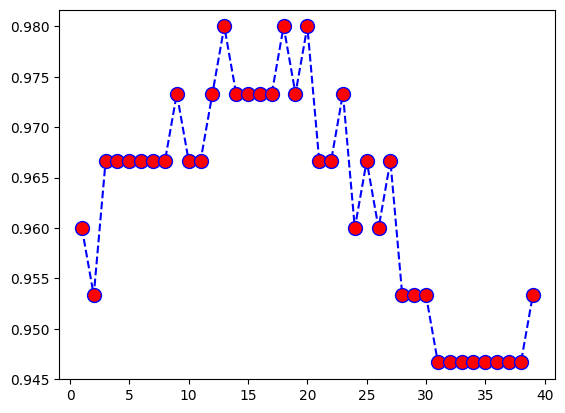

In [119]:
plt.plot(range(1,40), accuracy_rate, color= 'blue', linestyle= 'dashed', marker= 'o', markerfacecolor= 'red', markersize=10)

In [120]:
# We choose k= 16
knn= KNeighborsClassifier(n_neighbors= 16)
knn.fit(X_train, y_train)
y_pred= knn.predict(X_test)

In [121]:
#Evalaution of model
accuracy= accuracy_score(y_test, y_pred)
conf_matrix= confusion_matrix(y_test, y_pred)
class_report= classification_report(y_test, y_pred)

In [122]:
print("Accuracy:", accuracy)
print("\nConfusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", class_report)

Accuracy: 1.0

Confusion Matrix:
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [123]:
cv_scores = cross_val_score(knn, X, y, cv=10)

In [124]:
print("Cross-Validation Scores:", cv_scores)
print("Mean Cross-Validation Score:", cv_scores.mean())

Cross-Validation Scores: [1.         0.93333333 1.         1.         1.         0.93333333
 0.93333333 0.93333333 1.         1.        ]
Mean Cross-Validation Score: 0.9733333333333334


# Use PCA to reduce the dimensionality to 2 components for visualization

In [125]:
from sklearn.decomposition import PCA
from matplotlib.colors import ListedColormap
import numpy as np
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

In [126]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

# Create and train the KNN classifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [127]:
# Make predictions and evaluate the model
y_pred = knn.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 1.0

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



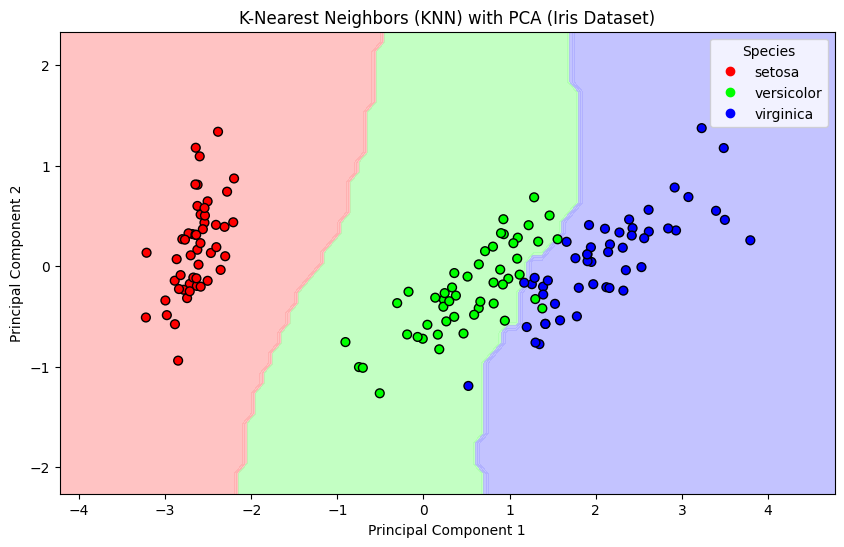

In [128]:
# Plot decision boundaries
x_min, x_max = X_pca[:, 0].min() - 1, X_pca[:, 0].max() + 1
y_min, y_max = X_pca[:, 1].min() - 1, X_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

# Predict on the mesh grid to create the decision boundaries
Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Define color maps
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

# Plot the decision boundaries and training points
plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z, cmap=cmap_light, alpha=0.7)
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap=cmap_bold, edgecolor='k', s=40)

# Labels and legend
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("K-Nearest Neighbors (KNN) with PCA (Iris Dataset)")
handles, _ = scatter.legend_elements()
plt.legend(handles, iris.target_names, title="Species")
plt.show()